In [2]:
import pandas as pd
cancer=pd.read_csv("D:/Imarti Excel files/breast-cancer-wisconsin.data",na_values="?")

In [3]:
cancer.shape

(698, 11)

In [4]:
cancer.columns=["code_number","Clump_Thickness","Uniformity_size","Uniformity_shape","Marginal_Adhesion","Epithelial_size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [5]:
cancer.Bare_Nuclei.fillna(cancer.Bare_Nuclei.mean(),inplace=True)

In [6]:
cancer.head()

,code_number,Clump_Thickness,Uniformity_size,Uniformity_shape,Marginal_Adhesion,Epithelial_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [7]:
cancer.columns

Index(['code_number', 'Clump_Thickness', 'Uniformity_size', 'Uniformity_shape',
       'Marginal_Adhesion', 'Epithelial_size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
cancer.dtypes

code_number            int64
Clump_Thickness        int64
Uniformity_size        int64
Uniformity_shape       int64
Marginal_Adhesion      int64
Epithelial_size        int64
Bare_Nuclei          float64
Bland_Chromatin        int64
Normal_Nucleoli        int64
Mitoses                int64
Class                  int64
dtype: object

In [8]:
cancer.isnull().sum()

code_number          0
Clump_Thickness      0
Uniformity_size      0
Uniformity_shape     0
Marginal_Adhesion    0
Epithelial_size      0
Bare_Nuclei          0
Bland_Chromatin      0
Normal_Nucleoli      0
Mitoses              0
Class                0
dtype: int64

In [9]:
cancer.Bare_Nuclei.unique()

array([10.       ,  2.       ,  4.       ,  1.       ,  3.       ,
        9.       ,  7.       ,  3.5483871,  5.       ,  8.       ,
        6.       ])

In [10]:
cancer.Bare_Nuclei.describe()

count    698.000000
mean       3.548387
std        3.603144
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

In [11]:
cancer.isnull().sum()

code_number          0
Clump_Thickness      0
Uniformity_size      0
Uniformity_shape     0
Marginal_Adhesion    0
Epithelial_size      0
Bare_Nuclei          0
Bland_Chromatin      0
Normal_Nucleoli      0
Mitoses              0
Class                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffb220b310>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffb220b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffb21f2e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffb221b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffb221b460>],
 'means': []}

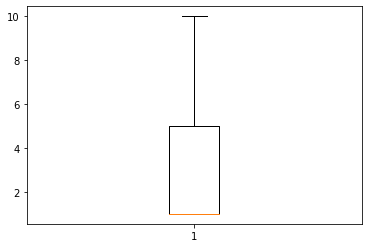

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.Bare_Nuclei)

In [13]:
from sklearn.model_selection import train_test_split

In [27]:
x=cancer.drop("Class",axis=1)
print(x)

     code_number  Clump_Thickness  Uniformity_size  Uniformity_shape  \
0        1002945                5                4                 4   
1        1015425                3                1                 1   
2        1016277                6                8                 8   
3        1017023                4                1                 1   
4        1017122                8               10                10   
..           ...              ...              ...               ...   
693       776715                3                1                 1   
694       841769                2                1                 1   
695       888820                5               10                10   
696       897471                4                8                 6   
697       897471                4                8                 8   

     Marginal_Adhesion  Epithelial_size  Bare_Nuclei  Bland_Chromatin  \
0                    5                7         10.0          

In [28]:
y=cancer.Class

In [29]:
print(y)

0      2
1      2
2      2
3      2
4      4
      ..
693    2
694    2
695    4
696    4
697    4
Name: Class, Length: 698, dtype: int64


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [31]:
x_train.shape

(558, 10)

In [32]:
y_train.shape

(558,)

In [33]:
x_test.shape

(140, 10)

In [34]:
y_test.shape

(140,)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression().fit(x_train,y_train)

In [37]:
model.score(x_train,y_train) 

0.6577060931899642

In [38]:
predicted_value=model.predict(x_test)
print(predicted_value)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [39]:
probability=model.predict_proba(x_test)
print(probability)

[[0.66386215 0.33613785]
 [0.61405568 0.38594432]
 [0.68577778 0.31422222]
 [0.68978055 0.31021945]
 [0.67859758 0.32140242]
 [0.67935901 0.32064099]
 [0.66891129 0.33108871]
 [0.69284625 0.30715375]
 [0.69710477 0.30289523]
 [0.52687573 0.47312427]
 [0.63439769 0.36560231]
 [0.695499   0.304501  ]
 [0.69882008 0.30117992]
 [0.67797684 0.32202316]
 [0.69820403 0.30179597]
 [0.6937952  0.3062048 ]
 [0.63136248 0.36863752]
 [0.66788056 0.33211944]
 [0.56498828 0.43501172]
 [0.68272725 0.31727275]
 [0.55415131 0.44584869]
 [0.69936462 0.30063538]
 [0.61843125 0.38156875]
 [0.60758388 0.39241612]
 [0.67021684 0.32978316]
 [0.54051919 0.45948081]
 [0.68418504 0.31581496]
 [0.67756415 0.32243585]
 [0.57362733 0.42637267]
 [0.55135249 0.44864751]
 [0.66151953 0.33848047]
 [0.68715886 0.31284114]
 [0.66310204 0.33689796]
 [0.68214134 0.31785866]
 [0.69173378 0.30826622]
 [0.68975635 0.31024365]
 [0.67166187 0.32833813]
 [0.69462566 0.30537434]
 [0.68996543 0.31003457]
 [0.68716624 0.31283376]


In [150]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,predicted_value)
cnf_matrix

array([[90,  0],
       [50,  0]], dtype=int64)